# 测试利用类来封装

## 定义函数缺少self

In [1]:
class frame2D:
    def __init__(self,center,x_axis):
        self.center=center
        self.x_axis=x_axis
    def show(text,size,color):#def show(self,text,size,color):
        print(text)
        print(size)
        print(color)

In [2]:
A=frame2D([0,0],[0,1])

In [3]:
A.show(1,1,"red")

TypeError: show() takes 3 positional arguments but 4 were given

## 改正后

In [4]:
class frame2D:
    def __init__(self,center,x_axis):
        self.center=center
        self.x_axis=x_axis
    def show(self,text,size,color):
        print(text)
        print(size)
        print(color)

In [5]:
A=frame2D([0,0],[0,1])
A.show(1,1,"red")

1
1
red


# 正式编写frame2D类

(-10.0, 10.0)

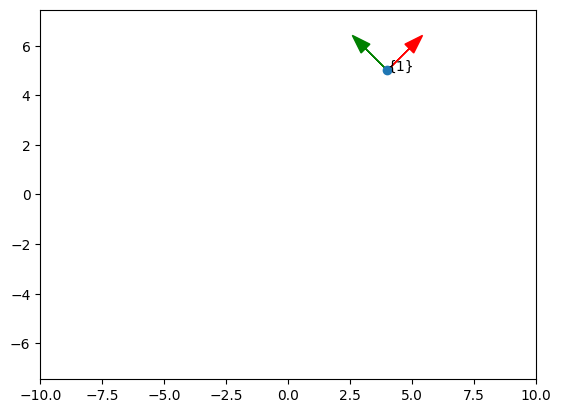

In [6]:
import numpy as np
import matplotlib.pyplot as plt
R90=np.array([[0,-1],[1,0]])
def frame_show(label,Point_A,Point_B,ax,size):
    import numpy as np
    R90=np.array([[0,-1],[1,0]])
    Line_AB=Point_B-Point_A
    norm_Line_AB=np.linalg.norm(Line_AB)
    if norm_Line_AB!=1:
        Line_AB=Line_AB/norm_Line_AB*size
    ax.arrow(Point_A[0],Point_A[1],Line_AB[0],Line_AB[1],head_width=0.5,length_includes_head=True,color="red")
    R90=np.array([[0,-1],[1,0]])#旋转公式
    Line_AB_Rot90=R90.dot(Line_AB)#点乘 
    ax.arrow(Point_A[0],Point_A[1],Line_AB_Rot90[0],Line_AB_Rot90[1],head_width=0.5,length_includes_head=True,color="green")
    plt.scatter(Point_A[0],Point_A[1])
    label="{"+str(label)+"}"
    plt.text(Point_A[0],Point_A[1],label)
    
def Rot_func(angle):
    import numpy as np
    angle=np.deg2rad(angle)
    R90=np.array([[0,-1],[1,0]])
    elem_sim=lambda elem: np.around(elem,0) if (elem-np.around(elem,0))<1e-10 else elem
    A11=elem_sim(np.cos(angle))
    A12=elem_sim(-np.sin(angle))
    A21=elem_sim(np.sin(angle))
    A22=A11
    Rot=np.array([[A11,A12],[A21,A22]])
    return Rot

def frame_show_angle_center(label,center,angle,ax,size):
    Rot=Rot_func(angle)
    x=np.array([1,0])
    x=Rot.dot(x)
    frame_show(label,center,x+center,ax,size)

ax=plt.axes()
frame_show_angle_center(1,np.array([4,5]),45,ax,2)
plt.axis('equal')# 等轴
plt.xlim([-10,10])
plt.ylim([-10,10])

    

In [7]:
class frame2D:
    def __init__(self):
        self.center=np.array([0,0])
        self.x_axis=np.array([1,0])
        self.y_axis=np.array([0,1])
        self.angle=0
    def show(self,ax,label,size,color):
        frame_show_angle_center(label,self.center,self.angle,ax,size)

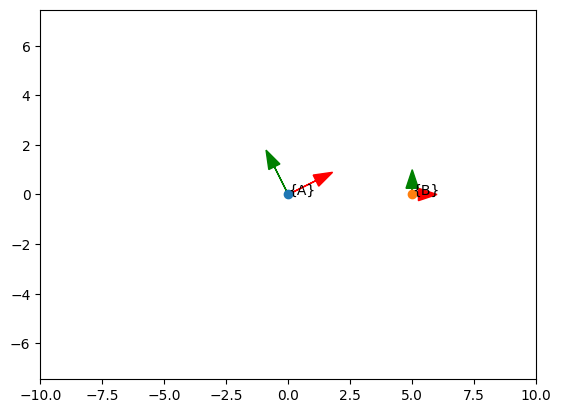

In [8]:
ax=plt.axes()
xlimit=10
ylimit=10
plt.axis('equal')# 等轴
plt.xlim([-xlimit,xlimit])
plt.ylim([-ylimit,ylimit])
A=frame2D()
A.angle=30
A.show(ax,"A",2,"red")
B=frame2D()
B.angle=0
B.center=np.array([5,0])
print(B) 
B.show(ax,"B",3,"blue")